<a href="https://colab.research.google.com/github/Alokmishra1997/flask/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("operator_tracking(1).csv")

In [3]:
df.head()

,id,operator_id,operation_id,date,bundle_number,style_id,floor_id,line_id,complete_piece,total_time,break_time,off_standard_time
0,181,4,22509,2022-03-28,181,8059,1,2,5,9,0,0
1,182,4,22509,2022-03-28,182,8059,1,2,5,16,0,0
2,183,4,22509,2022-03-28,183,8059,1,2,5,5,0,0
3,186,340,42664,2022-03-29,186,8059,26,91,10,564,0,0
4,187,340,42664,2022-03-29,187,8059,26,91,10,535,5,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 2000 non-null   int64 
 1   operator_id        2000 non-null   int64 
 2   operation_id       2000 non-null   int64 
 3   date               2000 non-null   object
 4   bundle_number      2000 non-null   int64 
 5   style_id           2000 non-null   int64 
 6   floor_id           2000 non-null   int64 
 7   line_id            2000 non-null   int64 
 8   complete_piece     2000 non-null   int64 
 9   total_time         2000 non-null   int64 
 10  break_time         2000 non-null   int64 
 11  off_standard_time  2000 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 187.6+ KB


In [5]:
df['operator_id'].nunique()

31

In [6]:
df['operator_id'].unique()

array([   4,  340, 1138, 8246, 5564, 1008, 5802, 2845, 1053, 5939, 1096,
       5324, 8179, 2846, 1137, 1195, 3143, 1114, 5804, 8182, 1111, 2465,
       5805, 1129, 1133, 1124, 1104, 1117, 2471, 1121, 1131])

In [7]:
df['operation_id'].unique()

array([22509, 42664, 29706, 29378, 39511, 41409,    35, 43605, 43606,
         226, 34188, 34187, 36347, 28968, 36360, 35470, 44012, 33112,
       29506, 29488, 44016, 29507, 29514, 28989, 33858, 44018, 29504,
       29511, 44014, 45087, 44008, 44007, 29516, 36365, 44011, 29508,
       29528, 40345, 29017, 29544, 28983, 44021, 39332, 44019])

Total no of of unique operation =44


Total number of operator is working =31

In [ ]:
df['bundle_number'].nunique()
#Total 2000 bundle is present

2000

In [ ]:
df['style_id'].unique()
#Total 13 unique style is present

array([8059, 8043, 8044, 7654, 8309, 8691, 8632, 8702, 8813, 8815, 7759,
       8447, 8045])

In [ ]:
df['floor_id'].unique()
#Total 3 floor has existed

array([ 1, 26, 24])

In [ ]:
df['line_id'].unique()

array([  2,  91, 133,   1, 136])

In [ ]:
cross_tab = pd.crosstab(df['floor_id'], df['line_id'])
print(cross_tab)
# Floor 1 has two line  1 and 2
# Floor 24 has  two line 133 and 136 .line  133  processed higest number bundle
# Floor  26 has  one line 91


line_id   1    2    91    133  136
floor_id                          
1           6    5    0     0    0
24          0    0    0  1685   39
26          0    0  265     0    0


In [ ]:
df1=df.sort_values('total_time',ascending=False)

In [ ]:
df1[['bundle_number','complete_piece','total_time']].head(100)

,bundle_number,complete_piece,total_time
63,249,20,3254
1344,1907,12,3185
1024,1509,12,2783
1843,2554,19,2697
804,1218,25,2471
...,...,...,...
222,437,20,1021
765,1160,20,1019
68,254,20,1019
111,299,20,1004


Some bundle  take more time for completeing and some  bundle take lesss time for completing .


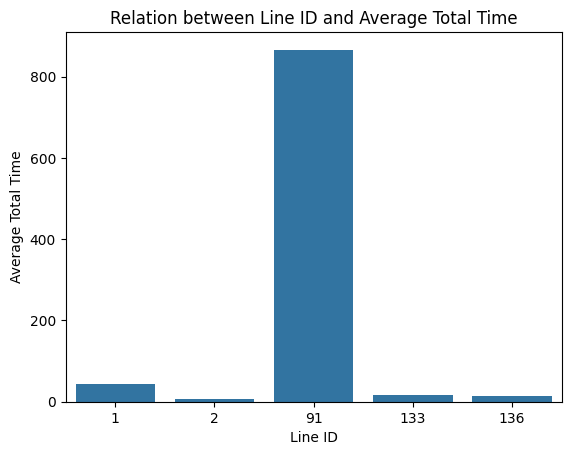

In [ ]:
avg_time_per_line = df.groupby('line_id')['total_time'].mean().reset_index()
sns.barplot(x='line_id', y='total_time', data=avg_time_per_line)
plt.xlabel('Line ID')
plt.ylabel('Average Total Time')
plt.title('Relation between Line ID and Average Total Time')
plt.show()

For the line id 91 Average Total Time for completion   is More .

In [8]:
style_df=pd.read_csv("styles_operation_list(1).csv")

In [9]:
style_df.head()

,id,style_id,operation_id,sort_order,sam,rate,machine_id
0,111743,5292,30,940,48.63,0.0,651
1,208151,5542,3207,0,0.70,0.0,156
2,208152,5542,3206,0,0.56,0.0,156
3,208153,5542,3205,0,0.56,0.0,156
4,208154,5542,30,0,1.10,0.0,156


In [ ]:
style_df.shape

(181721, 7)

In [ ]:
style_df['style_id'].nunique()

3733

In [ ]:
style_df['operation_id'].nunique()

34803

In [ ]:
style_df['machine_id'].nunique()
#Total 457 unique machine has used in the operation

457

In [ ]:
style_df['sort_order'].nunique()
# Total 393 sequence operation has performed

393

In [ ]:
#find the operation which has performed first sequence .
style_df[style_df['sort_order']==0]['operation_id'].nunique()
# Total 13456 operation has completed in first sequence
style_df[style_df['sort_order']==0]['operation_id'].unique()


array([  3207,   3206,   3205, ..., 269176, 269179, 269429])

In [ ]:
style_df[style_df['sort_order']==0]['machine_id'].nunique()
#Total 235 machine is used for first sequence operation

235

In [ ]:
# Relation between style_id  and no of opperation


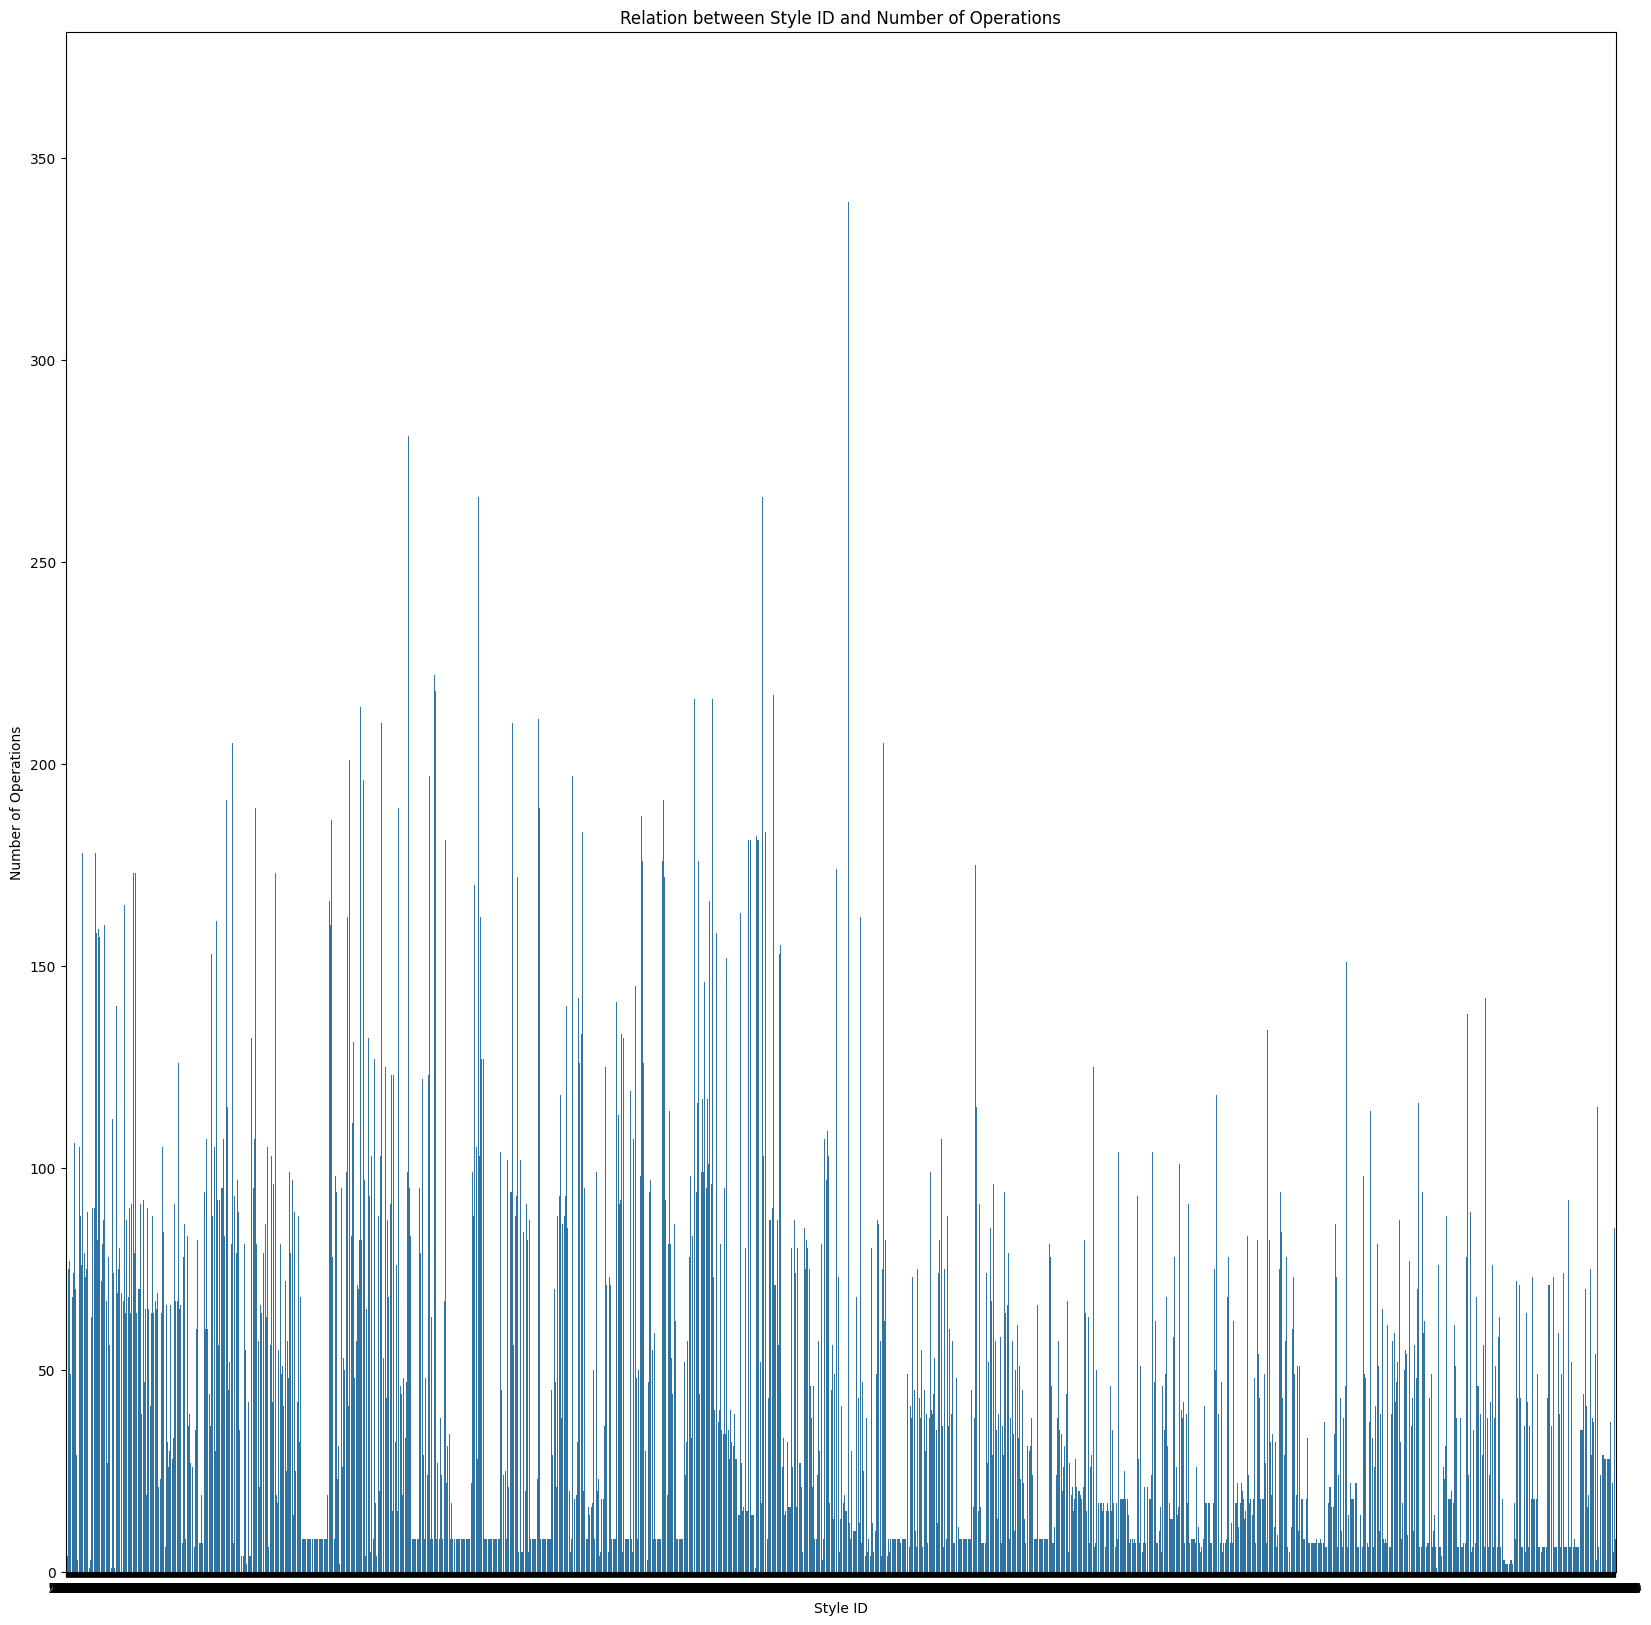

In [ ]:
style_operation_count = style_df.groupby('style_id')['operation_id'].count().reset_index()
plt.figure(figsize=(20, 20))
sns.barplot(x='style_id', y='operation_id', data=style_operation_count)
plt.xlabel('Style ID')
plt.ylabel('Number of Operations')
plt.title('Relation between Style ID and Number of Operations')
plt.show()


In [ ]:
style_operation_count[style_operation_count['operation_id']== style_operation_count['operation_id'].max()]

# style_id 166581 has highest no of operation which is 363

,style_id,operation_id
1535,166581,363


In [ ]:
style_operation_count[style_operation_count['operation_id']== style_operation_count['operation_id'].min()]

#For making these style we required single operation.


,style_id,operation_id
0,5292,1
36,10618,1
57,12896,1
110,18766,1
117,20211,1
1173,141300,1
1661,171120,1
3301,261841,1
3466,270891,1
3488,270915,1


In [ ]:
# for making one single style what is the stanard allowed time
style_time_count=style_df.groupby('style_id')['sam'].sum().reset_index()

In [ ]:
style_time_count[style_time_count['sam']==style_time_count['sam'].max()]
#for  making one single style_id 152519 we will required maximum time of 3404.17 minute


,style_id,sam
1345,152519,3404.17


In [ ]:
style_time_count[style_time_count['sam']==style_time_count['sam'].min()]
# #for  making one single style_id 114541 we will required minimum time of 0 minute


,style_id,sam
720,114541,0.0


In [ ]:
style_df.corr()

,id,style_id,operation_id,sort_order,sam,rate,machine_id
id,1.000000,0.948118,0.657231,-0.070368,0.049912,-0.023913,0.551687
style_id,0.948118,1.000000,0.735361,-0.053964,0.054485,-0.059121,0.662534
operation_id,0.657231,0.735361,1.000000,-0.040004,-0.012561,-0.107607,0.701243
sort_order,-0.070368,-0.053964,-0.040004,1.000000,-0.002480,-0.001503,-0.035452
sam,0.049912,0.054485,-0.012561,-0.002480,1.000000,0.003253,0.076805
rate,-0.023913,-0.059121,-0.107607,-0.001503,0.003253,1.000000,-0.134423
machine_id,0.551687,0.662534,0.701243,-0.035452,0.076805,-0.134423,1.000000


In [ ]:
# for making one single style_id no of machine_id used
style_machine_count=style_df.groupby('style_id')['machine_id'].nunique().reset_index()

In [ ]:
style_machine_count

,style_id,machine_id
0,5292,1
1,5542,14
2,6267,14
3,7654,14
4,7719,2
...,...,...
3728,292749,2
3729,292815,2
3730,293265,2
3731,293630,2


In [ ]:
style_machine_count[style_machine_count['machine_id']==style_machine_count['machine_id'].max()]
# for making  style_id 72585 we  required maximum machine 33

,style_id,machine_id
376,72566,33


In [ ]:
style_machine_count[style_machine_count['machine_id']==style_machine_count['machine_id'].min()]
# for these style id we required single machine

,style_id,machine_id
0,5292,1
28,10425,1
36,10618,1
48,12458,1
57,12896,1
...,...,...
3690,286540,1
3691,287788,1
3693,288909,1
3726,292149,1


In [ ]:
# for making one single style_id what will be the cost need to be paid
style_rate=style_df.groupby('style_id')['rate'].sum().reset_index()

In [ ]:
style_rate

,style_id,rate
0,5292,0.000
1,5542,0.000
2,6267,0.000
3,7654,0.000
4,7719,0.000
...,...,...
3728,292749,0.000
3729,292815,0.041
3730,293265,106.301
3731,293630,46.000


In [ ]:
style_rate[style_rate['rate']==style_rate['rate'].max()]
#for making this style id we have paid 256.68 INR

,style_id,rate
1535,166581,256.68


In [ ]:
style_rate[style_rate['rate']==style_rate['rate'].min()]
#for making this style id we have paid 0 INR

,style_id,rate
0,5292,0.0
1,5542,0.0
2,6267,0.0
3,7654,0.0
4,7719,0.0
...,...,...
3722,291699,0.0
3723,291705,0.0
3724,291712,0.0
3726,292149,0.0


In [ ]:
style_df.head()

,id,style_id,operation_id,sort_order,sam,rate,machine_id
0,111743,5292,30,940,48.63,0.0,651
1,208151,5542,3207,0,0.70,0.0,156
2,208152,5542,3206,0,0.56,0.0,156
3,208153,5542,3205,0,0.56,0.0,156
4,208154,5542,30,0,1.10,0.0,156


In [ ]:
df.head()

,id,operator_id,operation_id,date,bundle_number,style_id,floor_id,line_id,complete_piece,total_time,break_time,off_standard_time
0,181,4,22509,2022-03-28,181,8059,1,2,5,9,0,0
1,182,4,22509,2022-03-28,182,8059,1,2,5,16,0,0
2,183,4,22509,2022-03-28,183,8059,1,2,5,5,0,0
3,186,340,42664,2022-03-29,186,8059,26,91,10,564,0,0
4,187,340,42664,2022-03-29,187,8059,26,91,10,535,5,0


In [10]:
operation_merge=pd.merge(df, style_df, on =['operation_id'], how='inner').drop(['id_y','id_x'] ,axis=1)

# New section

In [21]:
operation_merge.head()

,operator_id,operation_id,date,bundle_number,style_id_x,floor_id,line_id,complete_piece,total_time,break_time,off_standard_time,style_id_y,sort_order,sam,rate,machine_id
0,4,22509,2022-03-28,181,8059,1,2,5,9,0,0,10134,0,0.9,0.0,1189
1,4,22509,2022-03-28,181,8059,1,2,5,9,0,0,231939,0,0.9,0.0,1189
2,4,22509,2022-03-28,181,8059,1,2,5,9,0,0,276495,0,0.9,0.0,1189
3,4,22509,2022-03-28,181,8059,1,2,5,9,0,0,276495,0,0.9,0.0,1189
4,4,22509,2022-03-28,182,8059,1,2,5,16,0,0,10134,0,0.9,0.0,1189


In [19]:
style_merge=pd.merge(df, style_df, on =['style_id'], how='inner').drop(['id_y','id_x'] ,axis=1)

In [22]:
style_merge.head()

,operator_id,operation_id_x,date,bundle_number,style_id,floor_id,line_id,complete_piece,total_time,break_time,off_standard_time,operation_id_y,sort_order,sam,rate,machine_id
0,4,22509,2022-03-28,181,8059,1,2,5,9,0,0,3207,0,0.70,0.0,156
1,4,22509,2022-03-28,181,8059,1,2,5,9,0,0,3206,0,0.56,0.0,156
2,4,22509,2022-03-28,181,8059,1,2,5,9,0,0,3205,0,0.56,0.0,156
3,4,22509,2022-03-28,181,8059,1,2,5,9,0,0,30,0,1.10,0.0,156
4,4,22509,2022-03-28,181,8059,1,2,5,9,0,0,12134,0,2.00,0.0,156


In [49]:
 #**Relationship between Style and Operator Productivity:**
#    - Analyze the average total time spent on bundles for each style to identify styles that require more time or have lower productivity.
#    - Investigate if certain styles are consistently associated with higher or lower operator efficiency.

# Calculate the average total time spent on bundles for each style
avg_time_per_style = style_merge.groupby('style_id')['total_time'].mean().reset_index()

# Sort the styles by average total time
avg_time_per_style = avg_time_per_style.sort_values(by='total_time', ascending=True)
print("avg_time_per_style :", avg_time_per_style)
# Identify styles with the highest and lowest average total time
highest_time_styles = avg_time_per_style.head()
print("highest_time_styles :", highest_time_styles)

lowest_time_styles = avg_time_per_style.tail(5)
print("lowest_time_styles :", lowest_time_styles)
print("lowest_time_style :", lowest_time_styles.index[0])
# Investigate if certain styles are consistently associated with higher or lower operator efficiency
# One approach is to analyze the correlation between style_id and total_time.
correlation = style_merge['style_id'].corr(style_merge['total_time'])

print("correlation :", correlation)
# If the correlation is negative, it indicates that styles with higher style_id tend to have lower total_time, suggesting higher operator efficiency.
# Conversely, a positive correlation suggests lower operator efficiency for styles with higher style_id.

# Further analysis can involve examining the specific operations involved in each style to identify potential causes for variations in operator efficiency.


avg_time_per_style :     style_id  total_time
8       8632   59.255208
7       8447   63.007634
4       8045   69.318182
5       8059   71.616487
10      8702   87.702532
1       7759   90.125000
11      8813   97.535714
9       8691  104.689552
12      8815  111.833856
6       8309  112.259259
2       8043  136.333333
0       7654  238.343023
3       8044  314.888889
highest_time_styles :     style_id  total_time
8       8632   59.255208
7       8447   63.007634
4       8045   69.318182
5       8059   71.616487
10      8702   87.702532
lowest_time_styles :     style_id  total_time
12      8815  111.833856
6       8309  112.259259
2       8043  136.333333
0       7654  238.343023
3       8044  314.888889
lowest_time_style : 12
correlation : -0.13174030080748425


In [48]:
# **Impact of Style on Machine Usage:**
#    - Examine the number of unique machines used for each style to understand the resource allocation for different styles.
#    - Identify styles that require a higher variety of machines, potentially indicating more complex production processes.
#  from style_merge dataframe

# Calculate the number of unique machines used for each style
style_machine_count = style_merge.groupby('style_id')['machine_id'].nunique().reset_index()

# Sort the styles by the number of unique machines used
style_machine_count = style_machine_count.sort_values(by='machine_id', ascending=False)

print("style_machine_count :", style_machine_count)
# Identify styles with the highest and lowest number of unique machines
highest_machine_styles = style_machine_count.head()
print("highest_machine_styles :", highest_machine_styles)

lowest_machine_styles = style_machine_count.tail(5)
print("lowest_machine_styles :", lowest_machine_styles)

# Investigate styles that require a higher variety of machines
# One approach is to examine the specific machines used for each style to identify potential reasons for the higher variety.
# This can be done by analyzing the `machine_id` values associated with each style in the `style_merge` dataframe.

# Further analysis can involve exploring the relationship between the number of unique machines used and other factors such as style complexity, production volume, or operator efficiency.



style_machine_count :     style_id  machine_id
8       8632          21
1       7759          20
7       8447          17
2       8043          16
11      8813          16
3       8044          15
9       8691          15
12      8815          15
0       7654          14
4       8045          14
5       8059          14
10      8702          13
6       8309           2
highest_machine_styles :     style_id  machine_id
8       8632          21
1       7759          20
7       8447          17
2       8043          16
11      8813          16
lowest_machine_styles :     style_id  machine_id
0       7654          14
4       8045          14
5       8059          14
10      8702          13
6       8309           2


In [47]:
 #**Cost Analysis by Style:**
#    - Calculate the total cost incurred for producing each style by considering the `rate` associated with each operation.
#    - Investigate if there are any correlations between style complexity and production costs.

# Calculate the total cost for each style
style_cost = style_merge.groupby('style_id')['rate'].sum().reset_index()

# Sort the styles by total cost
style_cost = style_cost.sort_values(by='rate', ascending=True)

print("style_cost :", style_cost)
# Identify styles with the highest and lowest total cost
highest_cost_styles = style_cost.head()
print("highest_cost_styles :", highest_cost_styles)

lowest_cost_styles = style_cost.tail(5)
print("lowest_cost_styles :", lowest_cost_styles)

# Investigate if there are any correlations between style complexity and production costs
# One approach is to analyze the correlation between style_id and rate.
correlation = style_cost['style_id'].corr(style_cost['rate'])

print("correlation :", correlation)
# If the correlation is positive, it indicates that styles with higher style_id tend to have higher production costs, suggesting a potential relationship between style complexity and cost.
# Conversely, a negative correlation suggests lower production costs for styles with higher style_id.

# Further analysis can involve examining the specific operations involved in each style to identify potential factors contributing to the cost variations.

# Additionally, exploring the relationship between style complexity (e.g., number of operations, sam) and production costs can provide insights into the cost implications of different styles.

style_cost :     style_id   rate
0       7654    0.0
1       7759    0.0
2       8043    0.0
3       8044    0.0
4       8045    0.0
5       8059    0.0
7       8447    0.0
8       8632    0.0
9       8691    0.0
10      8702    0.0
11      8813    0.0
12      8815    0.0
6       8309  189.0
highest_cost_styles :    style_id  rate
0      7654   0.0
1      7759   0.0
2      8043   0.0
3      8044   0.0
4      8045   0.0
lowest_cost_styles :     style_id   rate
9       8691    0.0
10      8702    0.0
11      8813    0.0
12      8815    0.0
6       8309  189.0
correlation : 0.00023001964420592456


In [53]:
# **Identifying Bottlenecks:**
#    - Analyze the total time spent on each operation within a style to identify potential bottlenecks that may be slowing down production.
#    - Explore if specific styles have operations that consistently take longer, indicating areas for improvement.

# Calculate the average total time spent on each operation within a style
operation_time = df.groupby(['style_id', 'operation_id'])['total_time'].mean().reset_index()
print(operation_time)

# Sort the operations by average total time
operation_time = operation_time.sort_values(by='total_time', ascending=False)

# Identify the top 5 operations with the highest average total time for each style
bottleneck_operations = operation_time.groupby('style_id').head(5)

print("bottleneck_operations :", bottleneck_operations)

# Investigate specific styles with operations that consistently take longer
# One approach is to analyze the specific operations and their associated total_time for each style identified in the `bottleneck_operations` dataframe.
# This can be done by filtering the `style_merge` dataframe based on the style_id values from `bottleneck_operations`.

# Further analysis can involve exploring the reasons behind the longer operation times, such as machine limitations, process inefficiencies, or operator skill level.

# Identifying and addressing bottlenecks can help improve overall production efficiency and reduce lead times.


     style_id  operation_id  total_time
0        7654           226   70.000000
1        7654         28968    6.650000
2        7654         29017    4.200000
3        7654         29488    5.833333
4        7654         29504    3.000000
..        ...           ...         ...
220      8815         44014    4.750000
221      8815         44018    3.789474
222      8815         44019    4.000000
223      8815         44021    3.200000
224      8815         45087    6.000000

[225 rows x 3 columns]
bottleneck_operations :      style_id  operation_id   total_time
178      8702         42664  1464.250000
192      8813         42664  1323.333333
215      8815         42664  1250.750000
152      8691         42664  1115.363636
18       7654         42664  1035.150943
..        ...           ...          ...
50       8045         33858     4.500000
54       8045         44007     4.250000
27       7759         29488     4.000000
28       7759         29514     4.000000
30       7759        

In [103]:
# Group the style_merge dataframe by style_id and sort by sort_order
style_sequence = style_merge.groupby('style_id').apply(lambda x: (x['style_id'].iloc[0], x.sort_values(by='sort_order', ascending=True)))

# Print the operation sequence for each style
style_and_operation_dic={}
style_id_and_machie_operation_dic={}
style_id_and_operator_dic={}
style_id_and_sort_order_dic={}


for style_id, group in style_sequence:
    print(f"Style ID: {style_id}")
    print("Operation Sequence:")
    lis=[]
    lis1=[]
    lis2=[]
    lis3=[]
    for _, row in group.iterrows():
       # print(f" - Operation ID: {row['operation_id_y']}")
       lis.append(row['operation_id_y'])
       lis1.append(row['machine_id'])
       lis2.append(row['operator_id'])
       lis3.append(row['sort_order'])
    style_and_operation_dic[style_id]=lis
    style_id_and_machie_operation_dic[style_id]=lis1
    style_id_and_operator_dic[style_id]=lis2
    style_id_and_sort_order_dic[style_id]=lis3

    #print("---")

# dictionary will contain style_id as a key and and  operations associated with that style_id

# dictionary will contain style_id as a key and and  machine_id associated with that style_id
# Identify common patterns or variations in operation sequences
# One approach is to analyze the frequency of each operation_id appearing in the sequence for all styles.
# This can be done by creating a dictionary where the keys are operation_id values and the values are lists containing the style_id values where that operation_id appears.

# Further analysis can involve examining the relationship between operation sequence and other factors such as style complexity, production volume, or operator efficiency.

# Understanding the operation sequence for each style can provide insights into the production process and identify potential areas for optimization.


<ipython-input-103-d00530bcf825>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  style_sequence = style_merge.groupby('style_id').apply(lambda x: (x['style_id'].iloc[0], x.sort_values(by='sort_order', ascending=True)))


Style ID: 7654
Operation Sequence:
Style ID: 7759
Operation Sequence:
Style ID: 8043
Operation Sequence:
Style ID: 8044
Operation Sequence:
Style ID: 8045
Operation Sequence:
Style ID: 8059
Operation Sequence:
Style ID: 8309
Operation Sequence:
Style ID: 8447
Operation Sequence:
Style ID: 8632
Operation Sequence:
Style ID: 8691
Operation Sequence:
Style ID: 8702
Operation Sequence:
Style ID: 8813
Operation Sequence:
Style ID: 8815
Operation Sequence:


In [100]:
#  **Operator Performance:**
#    - Correlate operator performance metrics (e.g., total time spent) with specific styles to assess if certain styles require more skilled operators or specialized training.

# Calculate the average total time spent on each style for each operator
operator_style_time = style_merge.groupby(['operator_id', 'style_id'])['total_time'].mean().reset_index()

# Sort the data by operator_id and average total time
operator_style_time = operator_style_time.sort_values(by=['operator_id', 'total_time'], ascending=True)

# Identify operators with the highest and lowest average total time for each style
highest_time_operators = operator_style_time.groupby('style_id').head(5)
print("highest_time_operators :", highest_time_operators)

lowest_time_operators = operator_style_time.groupby('style_id').tail(5)
print("lowest_time_operators :", lowest_time_operators)

# Investigate if certain styles require more skilled operators or specialized training
# One approach is to analyze the correlation between operator_id and total_time for each style.
# This can be done by grouping the `operator_style_time` dataframe by style_id and calculating the correlation coefficient between operator_id and total_time for each group.

# Further analysis can involve examining the specific operators and their associated total_time for each style identified in the `highest_time_operators` and `lowest_time_operators` dataframes.

# This can help identify potential training needs or areas for improvement in operator performance for specific styles.

highest_time_operators :      operator_id  style_id  total_time
1              4      8044    3.500000
2              4      8059   10.000000
3              4      8632   29.000000
0              4      7654   70.000000
6            340      8059  758.615385
..           ...       ...         ...
115         2845      8309    5.400000
123         2846      7759    4.000000
125         2846      8309  293.000000
139         5324      7759    4.000000
194         8246      7759  684.000000

[61 rows x 3 columns]
lowest_time_operators :      operator_id  style_id  total_time
15          1053      7759   14.000000
31          1111      7759    3.000000
74          1131      8045    4.000000
80          1133      8045    4.750000
88          1137      8045    4.500000
..           ...       ...         ...
194         8246      7759  684.000000
198         8246      8309  701.500000
193         8246      7654  717.828571
203         8246      8813  735.000000
200         8246      8632  741

In [102]:
# **Identifying High-Volume Styles:**
#    - Analyze the number of bundles produced for each style to identify high-volume styles that may require additional attention or resources.

# Calculate the total number of bundles produced for each style
style_bundle_count = style_merge.groupby('style_id')['bundle_number'].count().reset_index()
#print(style_bundle_count)

# Sort the styles by total bundle count
style_bundle_count = style_bundle_count.sort_values(by='bundle_number', ascending=False)

# Identify the top 5 styles with the highest bundle count
high_volume_styles = style_bundle_count.head(5)

print("high_volume_styles :", high_volume_styles)

# Investigate high-volume styles to identify potential resource requirements
# One approach is to analyze the specific operations involved in high-volume styles to understand the resource needs for each operation.
# This can be done by filtering the `style_merge` dataframe based on the style_id values from `high_volume_styles`.

# Further analysis can involve exploring the relationship between style volume and other factors such as style complexity, production costs, or operator efficiency.

# Identifying high-volume styles can help allocate resources effectively and ensure that production capacity is aligned with demand.

high_volume_styles :     style_id  bundle_number
9       8691          32495
8       8632          31872
5       8059          24273
0       7654          24080
12      8815          23606


In [104]:
#  **Identifying Styles with High Machine Utilization:**
#    - Examine the number of unique machines used for each style to identify styles that require a wider range of machinery or have higher machine utilization.

# Calculate the number of unique machines used for each style
style_machine_count = style_merge.groupby('style_id')['machine_id'].nunique().reset_index()

# Sort the styles by the number of unique machines used
style_machine_count = style_machine_count.sort_values(by='machine_id', ascending=False)

# Identify the top 5 styles with the highest number of unique machines
high_machine_styles = style_machine_count.head(5)

print("high_machine_styles :", high_machine_styles)

# Investigate styles with high machine utilization to understand resource allocation
# One approach is to analyze the specific machines used for high-machine styles to identify potential resource conflicts or bottlenecks.
# This can be done by filtering the `style_merge` dataframe based on the style_id values from `high_machine_styles`.

# Further analysis can involve exploring the relationship between machine utilization and other factors such as style complexity, production costs, or operator efficiency.

# Identifying styles with high machine utilization can help optimize resource allocation and ensure efficient use of machinery.

high_machine_styles :     style_id  machine_id
8       8632          21
1       7759          20
7       8447          17
2       8043          16
11      8813          16


In [108]:
#  **Investigating Style Complexity:**
#    - Explore the relationship between the number of operations and the `sam` (standard allowed minutes) for each style to understand the complexity of different styles.

# Calculate the number of operations for each style
style_operation_count = style_merge.groupby('style_id')['operation_id_y'].count().reset_index()

# Merge the operation count with the style_merge dataframe
style_complexity = pd.merge(style_merge, style_operation_count, on='style_id')

# Calculate the average sam for each style
style_complexity['avg_sam'] = style_complexity.groupby('style_id')['sam'].transform('mean')

# Sort the styles by average sam
style_complexity = style_complexity.sort_values(by='avg_sam', ascending=True)

# Identify the top 5 styles with the highest and lowest average sam
highest_complexity_styles = style_complexity.head(5)
print("highest_complexity_styles :", highest_complexity_styles)

lowest_complexity_styles = style_complexity.tail(5)
print("lowest_complexity_styles :", lowest_complexity_styles)

# Investigate the relationship between style complexity and other factors
# One approach is to analyze the correlation between the number of operations and average sam for each style.
correlation = style_complexity['operation_id_y_x'].corr(style_complexity['avg_sam'])

print("correlation :", correlation)
# If the correlation is positive, it indicates that styles with a higher number of operations tend to have higher average sam, suggesting greater complexity.
# Conversely, a negative correlation suggests lower complexity for styles with a higher number of operations.

# Further analysis can involve examining the specific operations involved in each style to identify potential factors contributing to the complexity variations.

# Understanding style complexity can help in planning production schedules, allocating resources, and identifying areas for process improvement.

highest_complexity_styles :        operator_id  operation_id_x        date  bundle_number  style_id  \
23443         5802           36360  2022-04-07            596      8691   
22314         2845           28968  2022-04-07            568      8691   
22313         2845           28968  2022-04-07            568      8691   
22312         2845           28968  2022-04-07            568      8691   
22311         2845           28968  2022-04-07            568      8691   

       floor_id  line_id  complete_piece  total_time  break_time  \
23443        24      133              12           5           0   
22314        24      133              12           4           0   
22313        24      133              12           4           0   
22312        24      133              12           4           0   
22311        24      133              12           4           0   

       off_standard_time  operation_id_y_x  sort_order   sam  rate  \
23443                  0             15207

In [113]:
# *Optimizing Production:**
#     - Based on the insights gained from the analysis, identify areas for improvement in production processes, such as optimizing machine allocation, reducing bottlenecks, or improving operator efficiency for specific styles. from style_merge datframe

# **Optimizing Machine Allocation:**
# - Analyze the machine usage patterns for each style to identify potential inefficiencies or underutilized machines.
# - Explore the possibility of reallocating machines to styles that require more resources or have higher production volumes.

# Calculate the total time each machine is used for each style
machine_style_time = style_merge.groupby(['style_id', 'machine_id'])['total_time'].sum().reset_index()

# Sort the data by style_id and total_time
machine_style_time = machine_style_time.sort_values(by=['style_id', 'total_time'], ascending=True)

# Identify styles with the highest and lowest machine usage
highest_machine_usage_styles = machine_style_time.groupby('style_id').tail(5)
print("highest_machine_usage_styles :", highest_machine_usage_styles)

lowest_machine_usage_styles = machine_style_time.groupby('style_id').head(5)
print("lowest_machine_usage_styles :", lowest_machine_usage_styles)

# Investigate styles with high or low machine usage to identify potential areas for improvement
# One approach is to analyze the specific machines used for these styles and their associated total_time.
# This can be done by filtering the `machine_style_time` dataframe based on the style_id values from `highest_machine_usage_styles` and `lowest_machine_usage_styles`.

# Further analysis can involve exploring the relationship between machine usage and other factors such as style complexity, production volume, or operator efficiency.

# Optimizing machine allocation can help reduce idle time, improve resource utilization, and increase overall production efficiency.

# **Reducing Bottlenecks:**
# - Identify the most time-consuming operations within each style and explore ways to streamline or improve their efficiency.
# - Consider implementing parallel processing or alternative methods to reduce the impact of bottlenecks on production flow.

# Calculate the average total time spent on each operation within a style
operation_time = df.groupby(['style_id', 'operation_id'])['total_time'].mean().reset_index()

# Sort the operations by average total time
operation_time = operation_time.sort_values(by='total_time', ascending=False)

# Identify the top 5 operations with the highest average total time for each style
bottleneck_operations = operation_time.groupby('style_id').head(5)

print("bottleneck_operations :", bottleneck_operations)

# Investigate specific styles with operations that consistently take longer
# One approach is to analyze the specific operations and their associated total_time for each style identified in the `bottleneck_operations` dataframe.
# This can be done by filtering the `style_merge` dataframe based on the style_id values from `bottleneck_operations`.

# Further analysis can involve exploring the reasons behind the longer operation times, such as machine limitations, process inefficiencies, or operator skill level.

# Identifying and addressing bottlenecks can help improve overall production efficiency and reduce lead times.

# **Improving Operator Efficiency:**
# - Analyze operator performance metrics to identify areas where training or skill development could enhance productivity.
# - Consider implementing incentives or recognition programs to motivate operators and improve overall performance.

# Calculate the average total time spent on each style for each operator
operator_style_time = style_merge.groupby(['operator_id', 'style_id'])['total_time'].mean().reset_index()

# Sort the data by operator_id and average total time
operator_style_time = operator_style_time.sort_values(by=['operator_id', 'total_time'], ascending=True)

# Identify operators with the highest and lowest average total time for each style
highest_time_operators = operator_style_time.groupby('style_id').head(5)
print("highest_time_operators :", highest_time_operators)

lowest_time_operators = operator_style_time.groupby('style_id').tail(5)
print("lowest_time_operators :", lowest_time_operators)

# Investigate operators with high or low performance to identify potential areas for improvement
# One approach is to analyze the specific styles handled by these operators and their associated total_time.
# This can be done by filtering the `operator_style_time` dataframe based on the operator_id values from `highest_time_operators` and `lowest_time_operators`.

# Further analysis can involve observing operator work practices, providing feedback, and implementing training programs to enhance skills and efficiency.

# Improving operator efficiency can directly impact production output and lead to increased productivity.

# By leveraging the insights gained from the data analysis, manufacturers can make informed decisions to optimize production processes, reduce inefficiencies, and ultimately enhance overall operational performance.


highest_machine_usage_styles :      style_id  machine_id  total_time
8        7654         435      245970
10       7654         439      245970
0        7654         156      409950
1        7654         420     1229850
2        7654         421     2541690
..        ...         ...         ...
189      8815         439      142700
177      8815         156      178375
180      8815         422      214050
178      8815         420      499450
179      8815         421     1034575

[62 rows x 3 columns]
lowest_machine_usage_styles :      style_id  machine_id  total_time
5        7654         431       81990
6        7654         432       81990
7        7654         433       81990
9        7654         438       81990
12       7654         454       81990
..        ...         ...         ...
182      8815         428       35675
184      8815         432       35675
185      8815         433       35675
186      8815         434       35675
188      8815         438       35675

[62